<a href="https://colab.research.google.com/github/bthodla/danano/blob/master/slide_deck_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# An Analysis of Prosper Loan Data
## by Bhasker Thodla

## Investigation Overview

> My goal is to present my analysis of the Prosper Loan data focusing on the efficacy of the loan strategy in terms of the health of loans granted, their recoverability and demographics

## Dataset Overview

> The dataset includes about 114,000 loan records from Prosper Loans, a company founded in 2005 to facilitate peer-to-peer lending in the US. The loan data is duly obfuscated to hide the identities of both borrowers and lenders and contains no peronally identifiable information (PII) to protect the privacy of the participants.

> The loan data provided ranges over a period from Nov 2005 to Mar 2014 (by loan origination date)

> The data is mostly clean although there are missing values in several fields

In [0]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from google.colab import drive

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

# To suppress numeric values from being returned in exponential format
pd.options.display.float_format = '{:20,.2f}'.format

# To display all charts against a white background
plt.style.use('seaborn-whitegrid')

In [0]:
# load in the dataset into a pandas dataframe
# Loading the Prosper Loan data saved in Google Drive
# from google.colab import drive

drive.mount('/content/gdrive')
data_folder = '/content/gdrive/My Drive/Colab Notebooks/data_visualization/prj5/'
prosper_loan_data_file = data_folder + 'prosperLoanDataAdj.csv'
pld_df = pd.read_csv(prosper_loan_data_file)

# We will set the order of Nominal Variables to represent the correct order in visualizations
loan_status_order = pld_df['LoanStatus'].value_counts().index
listing_category_order = pld_df['ListingCategoryStr'].value_counts().index
borrower_state_order = pld_df['BorrowerState'].value_counts().index
comb_credit_rating_order = ['NC', 'HR', 'E', 'D', 'C', 'B', 'A', 'AA']
income_range_order = ['$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+', 'Not displayed', 'Not employed']

# Finally, we will create separate dataframes for aggregate groupings - one by Income Range and another by Loan Origination Year
pld_df_ir = pld_df.groupby('IncomeRange').sum()[['LoanOriginalAmount', 'AmountDelinquent', 'LP_NetPrincipalLoss']].reset_index()
pld_df_year = pld_df.groupby('LoanOriginationYear').sum()[['LoanOriginalAmount', 'AmountDelinquent', 'LP_NetPrincipalLoss']].reset_index()
pld_df_region = pld_df.groupby('Region').sum()[['LoanOriginalAmount', 'AmountDelinquent', 'LP_NetPrincipalLoss']].reset_index()
pld_df_cr_rating = pld_df.groupby('CombCreditRating').sum()[['LoanOriginalAmount', 'AmountDelinquent', 'LP_NetPrincipalLoss']].reset_index()


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
pld_df_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
LoanOriginationYear    10 non-null int64
LoanOriginalAmount     10 non-null int64
AmountDelinquent       10 non-null float64
LP_NetPrincipalLoss    10 non-null float64
dtypes: float64(2), int64(2)
memory usage: 400.0 bytes


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.



```
# This is formatted as code
```

## 1. Year-over-year trend of Original Loan Amounts, Delinquencies and Net Principal Losses

> This visualization provides the following insights:
>> In general, yearly totals of Loan Amounts showed an increasing trend with some exceptions. For example, 2009 and 2014
>> However, Loan Delinquencies and Net Princial Losses were mostly flat indicating that they didn't rise correspondingly
>> In the years 2005 and 2007, Net Princial Losses were higher than Loan Delinquencies 

### Conclusion
> This shows that, in general, assessment of Borrowers' ability to repay (in other words, Loan Strategy)  was sound.

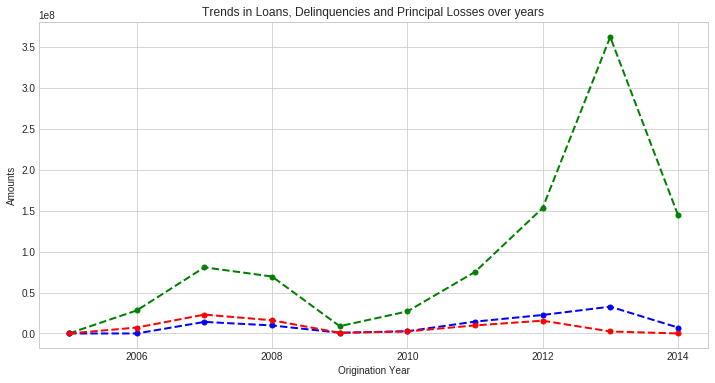

In [0]:
plt.figure(figsize=(12,6))

plt.plot(pld_df_year.LoanOriginationYear, pld_df_year.LoanOriginalAmount, color='green', marker='o', linestyle='dashed', linewidth=2, markersize=5)
plt.plot(pld_df_year.LoanOriginationYear, pld_df_year.AmountDelinquent, color='blue', marker='o', linestyle='dashed', linewidth=2, markersize=5)
plt.plot(pld_df_year.LoanOriginationYear, pld_df_year.LP_NetPrincipalLoss, color='red', marker='o', linestyle='dashed', linewidth=2, markersize=5)
plt.xlabel('Origination Year')
plt.ylabel('Amounts')
plt.title('Trends in Loans, Delinquencies and Principal Losses over years')
plt.gca().get_xaxis().get_major_formatter().set_scientific(False)
plt.show()

## 2. The relationship between delinquent loan amounts / net principal losses and Borrower Geographic Regions / Credit Rating / Income Ranges

> In this visualization (which is actually three related ones grouped together), I am analyzing the relationship between Delinquent Loan Amounts and Net Principal Losses as they relate to Borrowers' Demographic Regions, Credit Ratings and Income Ranges. This group of visualizations provides the following interesting insights:
>> The highest amount of delinquent loans and net princiapl losses were in the Southern Region amongst Borrowers in the Income Ranges between 25k and 75k with a Credit Rating of C or D

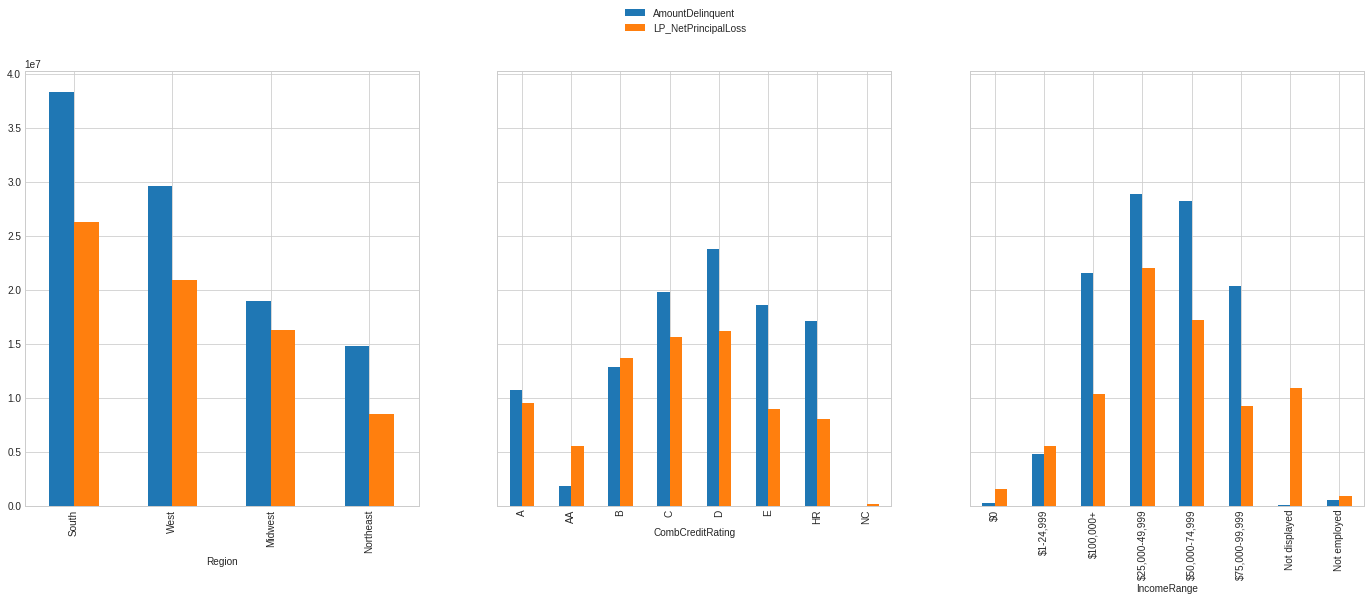

In [52]:
# The relationship between delinquent loan amounts / net principal losses and Borrower Geographic Regions / Credit Rating / Income Ranges

fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (24, 8), sharey = True)

pld_df.groupby("Region").sum()[['AmountDelinquent', 'LP_NetPrincipalLoss']].sort_values('AmountDelinquent', ascending=False).plot(kind='bar', ax=axes[0], legend = False)
pld_df.groupby('CombCreditRating').sum()[['AmountDelinquent', 'LP_NetPrincipalLoss']].plot(kind = 'bar', sort_columns = True, ax=axes[1], legend = False)
pld_df.groupby('IncomeRange').sum()[['AmountDelinquent', 'LP_NetPrincipalLoss']].plot(kind = 'bar', sort_columns = False, ax=axes[2], legend = False)

handles, labels = axes[2].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center');


## 3. Delinquent loans as a proportion of original loan amounts grouped by Borrowers' Region, Credit Rating and Income Range

> This visualization tells the story of the proportion of delinquent loans to original loan amounts classified into three groups:
>> Region

>> Credit Rating

>> Income Range

> The visualization depicts that the delinquent loans are a small percentage of original loan amounts, no matter which classifcation you look at
> Also, in general, there are more delinquencies in South (Region), amongst those with a credit rating of C or D and in the income range between 25 to 75k

> This conclusion matches with the one that we arrived at in our second story told above


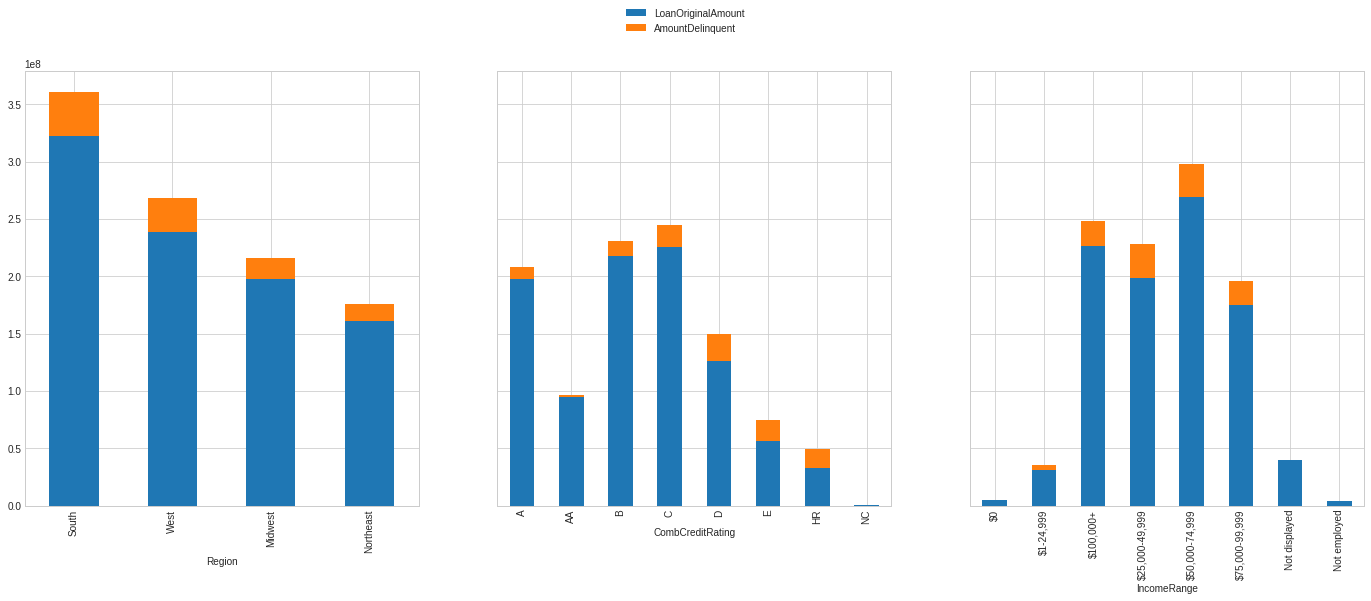

In [55]:
# Delinquent loans as a proportion of original loan amounts grouped by Borrowers' Region, Credit Rating and Income Range

fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (24, 8), sharey = True)

pld_df.groupby("Region").sum()[['LoanOriginalAmount', 'AmountDelinquent']].sort_values('AmountDelinquent', ascending=False).plot(kind='bar', ax=axes[0], legend = False, stacked = True)
pld_df.groupby('CombCreditRating').sum()[['LoanOriginalAmount', 'AmountDelinquent']].plot(kind = 'bar', sort_columns = True, ax=axes[1], legend = False, stacked = True)
pld_df.groupby('IncomeRange').sum()[['LoanOriginalAmount', 'AmountDelinquent']].plot(kind = 'bar', sort_columns = False, ax=axes[2], legend = False, stacked = True)

handles, labels = axes[2].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center');


## For bonus marks, I have restated the previous story to also include Net Principal Losses

> However, the conclusions remain the same

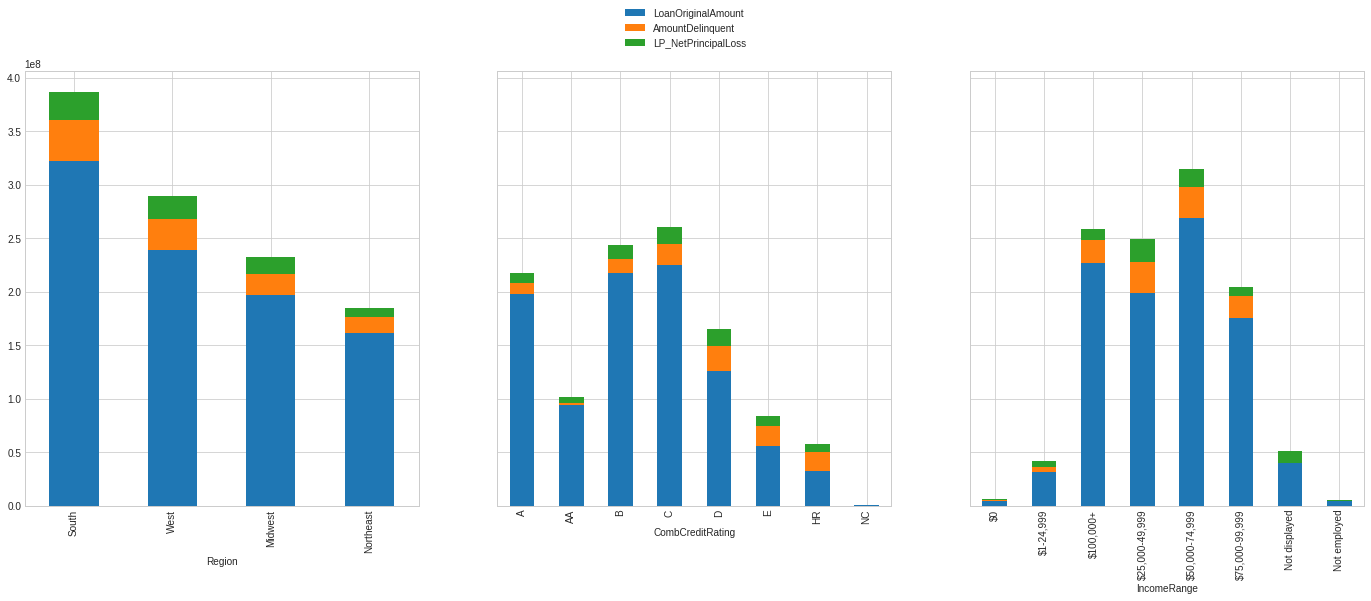

In [56]:
# For bonus marks, I have restated the previous story to also include Net Principal Losses

fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (24, 8), sharey = True)

pld_df.groupby("Region").sum()[['LoanOriginalAmount', 'AmountDelinquent', 'LP_NetPrincipalLoss']].sort_values('LoanOriginalAmount', ascending=False).plot(kind='bar', ax=axes[0], legend = False, stacked = True)
pld_df.groupby('CombCreditRating').sum()[['LoanOriginalAmount', 'AmountDelinquent', 'LP_NetPrincipalLoss']].plot(kind = 'bar', sort_columns = True, ax=axes[1], legend = False, stacked = True)
pld_df.groupby('IncomeRange').sum()[['LoanOriginalAmount', 'AmountDelinquent', 'LP_NetPrincipalLoss']].plot(kind = 'bar', sort_columns = False, ax=axes[2], legend = False, stacked = True)

handles, labels = axes[2].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center');


> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!